# Importing libs and loading data

In [65]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

# visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score

# data balancing lib
from imblearn.over_sampling import SMOTE

sns.set()

In [2]:
df = pd.read_csv('../data/customer_churn.csv')
df.set_index('customerID', inplace=True)

In [3]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,DailyCharges,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,2.186667,Mailed check,65.6,593.30
0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,1.996667,Mailed check,59.9,542.40
0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,2.463333,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,No,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,3.266667,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,No,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,2.796667,Mailed check,83.9,267.40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null 

# Encoding categorical data

## Encoding binary data

In [5]:
binary_data = df[['Churn', 'gender', 'SeniorCitizen', 'Partner', 
                  'Dependents', 'PhoneService', 'PaperlessBilling']].copy()

In [6]:
# Create an instance of One-hot-encoder for binary data
enc_binary = OneHotEncoder(drop='first')
  
# Passing encoded columns
encoded_binary_data = pd.DataFrame(enc_binary.fit_transform(binary_data).toarray(), columns=enc_binary.get_feature_names_out())

In [7]:
encoded_binary_data.head()

,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,1.0,0.0,1.0,1.0


## Encoding categorical data with more than 2 values

In [8]:
categorical_features = df.select_dtypes('object').columns
non_binary_categorical_features = categorical_features.drop(binary_data.columns)

In [9]:
non_binary_categorical_features

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [10]:
# Create an instance of One-hot-encoder for binary data
enc_categorical = OneHotEncoder(drop='first')
  
# Passing encoded columns
encoded_categorical_data = pd.DataFrame(enc_categorical.fit_transform(df[non_binary_categorical_features]).toarray(), 
                                        columns=enc_categorical.get_feature_names_out())

In [11]:
encoded_categorical_data.head()

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Merging encoded data

In [12]:
df_reset_index = df.reset_index()
numerical_data_and_customer_id = df_reset_index[df_reset_index.columns.drop(categorical_features)]
encoded_df = pd.concat([numerical_data_and_customer_id, encoded_binary_data, encoded_categorical_data], axis=1).set_index('customerID')

In [13]:
encoded_df.head()

,tenure,DailyCharges,MonthlyCharges,TotalCharges,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,9,2.186667,65.6,593.30,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
0003-MKNFE,9,1.996667,59.9,542.40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0004-TLHLJ,4,2.463333,73.9,280.85,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0011-IGKFF,13,3.266667,98.0,1237.85,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
0013-EXCHZ,3,2.796667,83.9,267.40,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Assessing and correcting target imbalance

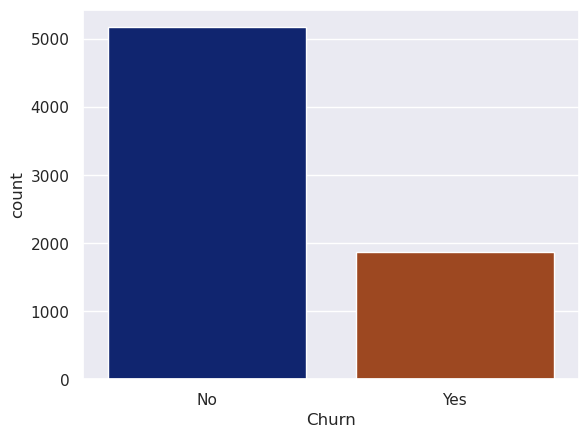

In [14]:
sns.countplot(x='Churn', data=df, palette='dark');

## Using [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#r001eabbe5dd7-1) to balance the target variable

In [15]:
sm = SMOTE(random_state=42)
X, y = encoded_df.drop('Churn_Yes', axis=1), encoded_df['Churn_Yes']
X_res, y_res = sm.fit_resample(X, y)

X_res['Churn'] = y_res
balanced_df = X_res.copy()

In [16]:
y_res.value_counts()

0.0    5174
1.0    5174
Name: Churn_Yes, dtype: int64

In [17]:
balanced_df

,tenure,DailyCharges,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,9,2.186667,65.600000,593.300000,0.000000,1.0,1.000000,1.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,1.000000,0.0
1,9,1.996667,59.900000,542.400000,1.000000,0.0,0.000000,1.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
2,4,2.463333,73.900000,280.850000,1.000000,0.0,0.000000,1.0,1.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.0
3,13,3.266667,98.000000,1237.850000,1.000000,1.0,0.000000,1.0,1.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,0.000000,1.0
4,3,2.796667,83.900000,267.400000,0.000000,1.0,0.000000,1.0,1.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,15,2.961588,88.847648,1352.435227,0.000000,0.0,0.000000,1.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.262670,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.262670,0.0,0.0,0.0,1.000000,0.000000,1.0
10344,5,3.038994,91.169816,454.008399,0.232721,0.0,0.000000,1.0,1.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,0.000000,1.0
10345,5,0.847322,25.419659,134.343657,1.000000,1.0,0.926666,1.0,0.926666,0.0,0.926666,0.000000,1.0,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.073334,1.0
10346,18,2.899029,86.970878,1583.691934,0.000000,1.0,0.483691,1.0,0.000000,0.0,0.516309,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.483691,0.0,0.483691,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.0


# Modeling

## Train-test split

In [18]:
X = balanced_df.drop('Churn', axis=1)
y = balanced_df['Churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training models

In [20]:
lr = LogisticRegression(max_iter=1000)
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [21]:
lr.fit(X_train, y_train) # training logistic regression

LogisticRegression(max_iter=1000)

In [22]:
rfc.fit(X_train, y_train) # training random forest classifier

RandomForestClassifier()

In [23]:
gbc.fit(X_train, y_train) # training gradient boosting classifier

GradientBoostingClassifier()

## Model evaluation

### Make predictions

In [24]:
y_pred_lr = lr.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_gbc = gbc.predict(X_test)

### Confusion Matrix

In [25]:
cm_lr = confusion_matrix(y_pred_lr, y_test)
cm_rfc = confusion_matrix(y_pred_rfc, y_test)
cm_gbc = confusion_matrix(y_pred_gbc, y_test)

Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix')

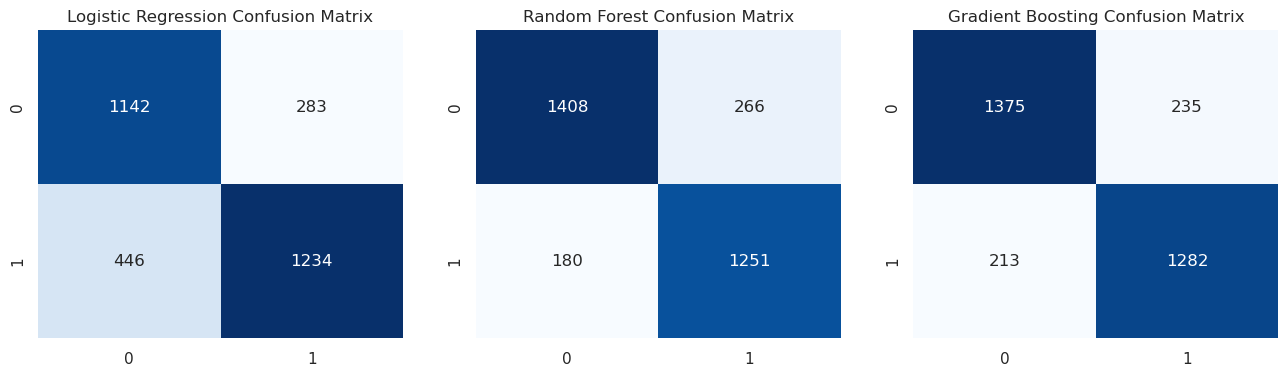

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

ax1, ax2, ax3 = axes

sns.heatmap(cm_lr, annot=True, cmap='Blues', cbar=False, fmt='.0f', ax=ax1)
ax1.set_title('Logistic Regression Confusion Matrix')

sns.heatmap(cm_rfc, annot=True, cmap='Blues', cbar=False, fmt='.0f', ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')

sns.heatmap(cm_gbc, annot=True, cmap='Blues', cbar=False, fmt='.0f', ax=ax3)
ax3.set_title('Gradient Boosting Confusion Matrix')

### Accuracy Score

In [27]:
lr_acc = round(accuracy_score(y_test, y_pred_lr), 3)
rfc_acc = round(accuracy_score(y_test, y_pred_rfc), 3)
gbc_acc = round(accuracy_score(y_test, y_pred_gbc), 3)

print(f"Logistic Regression Accuracy: {lr_acc}")
print(f"Random Forest Accuracy: {rfc_acc}")
print(f"Gradient Boosting Accuracy: {gbc_acc}")

Logistic Regression Accuracy: 0.765
Random Forest Accuracy: 0.856
Gradient Boosting Accuracy: 0.856


### Precision Score

In [28]:
lr_precision = round(precision_score(y_test, y_pred_lr), 3)
rfc_precision = round(precision_score(y_test, y_pred_rfc), 3)
gbc_precision = round(precision_score(y_test, y_pred_gbc), 3)

print(f"Logistic Regression Precision: {lr_precision}")
print(f"Random Forest Precision: {rfc_precision}")
print(f"Gradient Boosting Precision: {gbc_precision}")

Logistic Regression Precision: 0.735
Random Forest Precision: 0.874
Gradient Boosting Precision: 0.858


### Recall Score

In [29]:
lr_recall = round(recall_score(y_test, y_pred_lr), 3)
rfc_recall = round(recall_score(y_test, y_pred_rfc), 3)
gbc_recall = round(recall_score(y_test, y_pred_gbc), 3)

print(f"Logistic Regression Recall: {lr_recall}")
print(f"Random Forest Recall: {rfc_recall}")
print(f"Gradient Boosting Recall: {gbc_recall}")

Logistic Regression Recall: 0.813
Random Forest Recall: 0.825
Gradient Boosting Recall: 0.845


### Choosing model

From the evaluations above, let's choose the **Random Forest Classifier** as our main model.

### Feature Importances

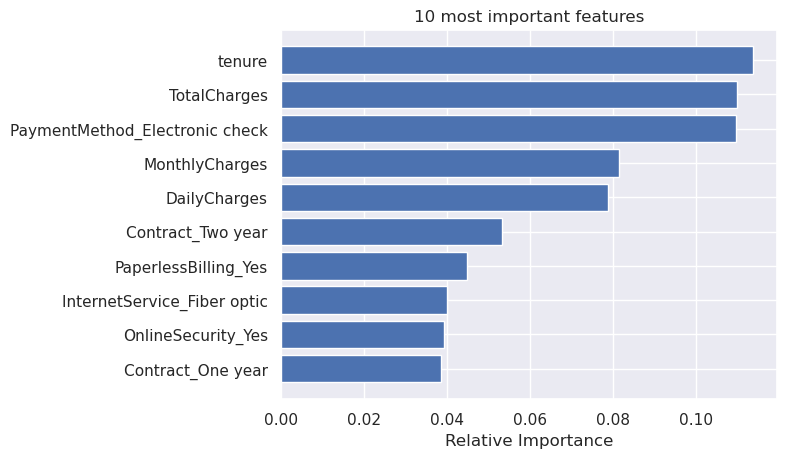

In [62]:
features = X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.title('10 most important features')
plt.show()

In [63]:
for name, importance in zip(X_train.columns, rfc.feature_importances_):
    print(name, "=", round(importance, 3))

tenure = 0.114
DailyCharges = 0.079
MonthlyCharges = 0.081
TotalCharges = 0.11
gender_Male = 0.023
Partner_Yes = 0.031
Dependents_Yes = 0.025
PhoneService_Yes = 0.004
PaperlessBilling_Yes = 0.045
MultipleLines_No phone service = 0.003
MultipleLines_Yes = 0.017
InternetService_Fiber optic = 0.04
InternetService_No = 0.009
OnlineSecurity_No internet service = 0.009
OnlineSecurity_Yes = 0.039
OnlineBackup_No internet service = 0.005
OnlineBackup_Yes = 0.027
DeviceProtection_No internet service = 0.004
DeviceProtection_Yes = 0.02
TechSupport_No internet service = 0.007
TechSupport_Yes = 0.036
StreamingTV_No internet service = 0.012
StreamingTV_Yes = 0.014
StreamingMovies_No internet service = 0.005
StreamingMovies_Yes = 0.014
Contract_One year = 0.039
Contract_Two year = 0.053
PaymentMethod_Credit card (automatic) = 0.014
PaymentMethod_Electronic check = 0.11
PaymentMethod_Mailed check = 0.012


## Cross-validation

We will be using a 10-fold Grid Search Cross Validation

In [81]:
param_grid = {
    'n_estimators': [5, 10, 20, 50, 100, 150, 200],
    'max_depth': [2, 5, 10, 15, 20]
}

grid_clf = GridSearchCV(rfc, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 15, 20],
                         'n_estimators': [5, 10, 20, 50, 100, 150, 200]})

In [82]:
print(grid_clf.best_estimator_)

RandomForestClassifier(max_depth=20, n_estimators=200)


In [83]:
print(grid_clf.best_params_)

{'max_depth': 20, 'n_estimators': 200}


## Evaluation

### Make predictions

In [87]:
rfc_cv = grid_clf.best_estimator_

In [88]:
y_pred_cv = rfc_cv.predict(X_test)

### Confusion Matrix

In [89]:
cm_rfc_cv = confusion_matrix(y_pred_cv, y_test)

Text(0.5, 1.0, 'Random Forest CV Confusion Matrix')

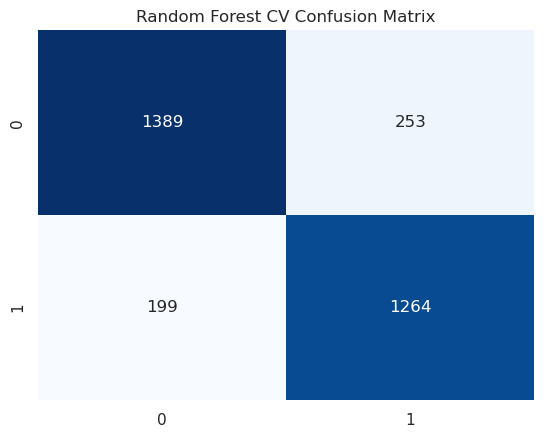

In [90]:
sns.heatmap(cm_rfc_cv, annot=True, cmap='Blues', cbar=False, fmt='.0f')
plt.title('Random Forest CV Confusion Matrix')

### Accuracy Score

In [91]:
rfc_acc_cv = round(accuracy_score(y_test, y_pred_cv), 3)

print(f"Random Forest CV Accuracy: {rfc_acc_cv}")

Random Forest CV Accuracy: 0.854


### Precision Score

In [94]:
rfc_acc_cv = round(precision_score(y_test, y_pred_cv), 3)

print(f"Random Forest CV Precision: {rfc_acc_cv}")

Random Forest CV Precision: 0.864


### Recall Score

In [95]:
rfc_acc_cv = round(recall_score(y_test, y_pred_cv), 3)

print(f"Random Forest CV Recall: {rfc_acc_cv}")

Random Forest CV Recall: 0.833
